In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr

In [46]:
df = pd.read_csv("/content/drive/MyDrive/Human_Development_Index_Dataset.csv", encoding='latin1')
df.head()
# df.describe()

,Unnamed: 0,iso3,country,year,hdi,life_expectancy,pop_millions,hdi_f,hdi_m,life_expec_f,...,gender_development,gender_inequality,secondary_education_f_%,secondary_education_m_%,seats_in_parliament_f_%,seats_in_parliament_m_%,labour_participation_f_%,labour_participation_m_%,co2_emission_tons,mat_footprint_percap_tons
0,1,AFG,Afghanistan,1990,0.284,45.967,10.694796,NaN,NaN,48.397,...,NaN,NaN,1.107733,7.899011,NaN,NaN,NaN,NaN,0.189279,2.1809
1,2,AFG,Afghanistan,1991,0.292,46.663,10.745167,NaN,NaN,49.144,...,NaN,NaN,1.221396,8.137953,NaN,NaN,NaN,NaN,0.178155,2.5264
2,3,AFG,Afghanistan,1992,0.299,47.596,12.057433,NaN,NaN,50.320,...,NaN,NaN,1.335059,8.376896,NaN,NaN,NaN,NaN,0.122920,2.6421
3,4,AFG,Afghanistan,1993,0.307,51.466,14.003760,NaN,NaN,52.739,...,NaN,NaN,1.448722,8.615838,NaN,NaN,NaN,NaN,0.106179,2.3022
4,5,AFG,Afghanistan,1994,0.300,51.495,15.455554,NaN,NaN,53.544,...,NaN,NaN,1.562385,8.854780,NaN,NaN,NaN,NaN,0.094063,1.8948


# **Problem 1A**

# **Problem - 1A - Single Year HDI Exploration (Latest Year: 2022)**

# **Objective:**

Explore the HDI dataset for the latest available year (2022) to practice basic EDA techniques.

**1. Extract Latest Year:**

• Identify unique years in the dataset.

• Filter the dataset to include only observations from the year 2022.

• Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).

In [47]:
#problem-1A
#1 Extract latest year
df['year'].unique()
hdi_2022_df = df[df['year']==2022].copy()
print(hdi_2022_df)

      Unnamed: 0       iso3                          country  year    hdi  \
32            33        AFG                      Afghanistan  2022  0.462   
65            66        ALB                          Albania  2022  0.789   
98            99        DZA                          Algeria  2022  0.745   
131          132        AND                          Andorra  2022  0.884   
164          165        AGO                           Angola  2022  0.591   
...          ...        ...                              ...   ...    ...   
6665        6666    ZZG.ECA          Europe and Central Asia  2022  0.802   
6698        6699    ZZH.LAC  Latin America and the Caribbean  2022  0.763   
6731        6732     ZZI.SA                       South Asia  2022  0.641   
6764        6765    ZZJ.SSA               Sub-Saharan Africa  2022  0.549   
6797        6798  ZZK.WORLD                            World  2022  0.739   

      life_expectancy  pop_millions     hdi_f     hdi_m  life_expec_f  ... 

**2. Data Exploration:**

• Display the first 10 rows of the 2022 dataset.

• Count the number of rows and columns.

• List all column names and their data types.

In [48]:
#2 Data Exploration
print(hdi_2022_df.head(10))
print(hdi_2022_df.shape)
print(hdi_2022_df.info())

     Unnamed: 0 iso3              country  year    hdi  life_expectancy  \
32           33  AFG          Afghanistan  2022  0.462           62.879   
65           66  ALB              Albania  2022  0.789           76.833   
98           99  DZA              Algeria  2022  0.745           77.129   
131         132  AND              Andorra  2022  0.884           83.552   
164         165  AGO               Angola  2022  0.591           61.929   
197         198  ATG  Antigua and Barbuda  2022  0.826           79.236   
230         231  ARG            Argentina  2022  0.849           76.064   
263         264  ARM              Armenia  2022  0.786           73.372   
296         297  AUS            Australia  2022  0.946           83.579   
329         330  AUT              Austria  2022  0.926           82.412   

     pop_millions     hdi_f     hdi_m  life_expec_f  ...  gender_development  \
32      41.128771  0.332443  0.534145        66.213  ...               0.622   
65       2.842

**3. Missing Values & Data Cleaning:**

• Check for missing values in each column and report total counts.

• Inspect dataset for:

– numeric columns stored as text,

– inconsistent or misspelled country names,

– duplicate rows,

– special characters (e.g., “–”) representing missing data.

• Apply necessary cleaning steps:

  – convert data types where needed,

  – remove duplicates,

  – handle missing values (drop or impute; justify your choice).

In [49]:
#3 Missing values and data cleaning
hdi_2022_df.isnull().sum()
hdi_2022_df['hdi'].dtype
sorted(hdi_2022_df['country'].unique())
hdi_2022_df.duplicated().sum()
hdi_2022_df['hdi'].unique()

array([0.462, 0.789, 0.745, 0.884, 0.591, 0.826, 0.849, 0.786, 0.946,
       0.926, 0.76 , 0.82 , 0.888, 0.67 , 0.809, 0.801, 0.942, 0.7  ,
       0.504, 0.681, 0.698, 0.779, 0.708, 0.823, 0.799, 0.438, 0.42 ,
       0.661, 0.6  , 0.587, 0.935, 0.387, 0.394, 0.86 , 0.788, 0.758,
       0.586, 0.593, 0.481, 0.806, 0.534, 0.878, 0.764, 0.907, 0.895,
       0.952, 0.515, 0.74 , 0.766, 0.765, 0.728, 0.674, 0.65 , 0.493,
       0.899, 0.61 , 0.492, 0.729, 0.91 , 0.693, 0.495, 0.814, 0.95 ,
       0.602, 0.893, 0.793, 0.629, 0.471, 0.483, 0.742, 0.552, 0.624,
       0.956, 0.851, 0.959, 0.644, 0.713, 0.78 , 0.673, 0.915, 0.906,
       0.706, 0.92 , 0.736, 0.802, 0.601, 0.628,   nan, 0.929, 0.847,
       0.701, 0.62 , 0.879, 0.723, 0.521, 0.487, 0.746, 0.927, 0.508,
       0.807, 0.762, 0.41 , 0.731, 0.54 , 0.796, 0.781, 0.634, 0.763,
       0.741, 0.844, 0.461, 0.608, 0.696, 0.939, 0.669, 0.548, 0.966,
       0.819, 0.797, 0.716, 0.568, 0.71 , 0.881, 0.874, 0.875, 0.827,
       0.821, 0.838,

In [50]:
#cleaning steps
if hdi_2022_df['hdi'].dtype == 'object':
  print("\n'hdi' column is stored as text. Converting to numeric...")
  hdi_2022_df['hdi'] = hdi_2022_df['hdi'].replace(['--', '-', 'NA', 'n/a'], np.nan)

  hdi_2022_df['hdi'] = pd.to_numeric(hdi_2022_df['hdi'], errors='coerce')
  print("Conversion complete.")
# Removal of duplicates
duplicates_before = hdi_2022_df.duplicated().sum()
hdi_2022_df = hdi_2022_df.drop_duplicates()
duplicates_after = hdi_2022_df.duplicated().sum()
print(f"\nRemoved {duplicates_before - duplicates_after} duplicate rows.")
# Removal of rows with missing HDI
rows_before = len(hdi_2022_df)
hdi_2022_df = hdi_2022_df.dropna(subset=['hdi'])
rows_after = len(hdi_2022_df)
print(f"Dropped {rows_before - rows_after} rows with missing HDI values.")


Removed 0 duplicate rows.
Dropped 2 rows with missing HDI values.


**4. Basic Statistics:**

• Compute the mean, median, and standard deviation of HDI for the year 2022.

• Identify the country with the highest HDI in 2022.

• Identify the country with the lowest HDI in 2022.

In [51]:
#4 Basic stats
#mean, median and standard deviation
print(f"\nMean HDI: {hdi_2022_df['hdi'].mean():.3f}")
print(f"Median HDI: {hdi_2022_df['hdi'].median():.3f}")
print(f"Standard Deviation HDI: {hdi_2022_df['hdi'].std():.3f}")

#countries with highest hdi
highest_hdi = hdi_2022_df[hdi_2022_df['hdi'] == hdi_2022_df['hdi'].max()]
print(f"\nHighest HDI Country: {highest_hdi['country'].values[0]}")
print(f"HDI Value: {highest_hdi['hdi'].values[0]:.3f}")

#countries with lowest hdi
lowest_hdi = hdi_2022_df[hdi_2022_df['hdi'] == hdi_2022_df['hdi'].min()]
print(f"\nLowest HDI Country: {lowest_hdi['country'].values[0]}")
print(f"HDI Value: {lowest_hdi['hdi'].values[0]:.3f}")




Mean HDI: 0.723
Median HDI: 0.740
Standard Deviation HDI: 0.153

Highest HDI Country: Switzerland
HDI Value: 0.967

Lowest HDI Country: Somalia
HDI Value: 0.380


**5. Filtering and Sorting:**

• Filter countries with HDI {"hdi"} greater than 0.800.

• Sort this filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in
descending order.

• Display the top 10 countries.

In [52]:

#Filtering countries with HDI {"hdi"} greater than 0.800.
high_hdi_countries = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
print(f"Countries with HDI > 0.800: {len(high_hdi_countries)}")

#Sorting the filtered dataset by Gross National Income (GNI) per Capita {"gross inc percap"} in descending order and displaying the top 10 countries
if 'gross_inc_percap' in high_hdi_countries.columns:
  sorted_high = high_hdi_countries.sort_values('gross_inc_percap', ascending=False)
  print("\nTop 10 countries (sorted by GNI per capita):")
  print(sorted_high[['country', 'hdi', 'gross_inc_percap']].head(10))
else:
  print("\n'gross_inc_percap' column not found in data")

Countries with HDI > 0.800: 71

Top 10 countries (sorted by GNI per capita):
                     country    hdi  gross_inc_percap
3332           Liechtenstein  0.942      146673.24150
4718                   Qatar  0.875       95944.37754
5213               Singapore  0.949       88761.14559
2705                 Ireland  0.950       87467.51391
3398              Luxembourg  0.927       78554.23640
6104    United Arab Emirates  0.937       74103.71494
5609             Switzerland  0.967       69432.78669
4322                  Norway  0.966       69189.76165
6170           United States  0.927       65564.93798
2474  Hong Kong, China (SAR)  0.956       62485.50516


**6. Adding HDI Category Column:**

• Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):


HDI Category HDI Range (hdi)

Low < 0.550

Medium 0.550 – 0.699

High 0.700 – 0.799

Very ≥ 0.800

After creating this new column:

• verify that all countries are classified correctly,

• ensure the updated dataframe includes the new category column.

• Save the final dataframe as HDI category added.csv and include this file in your final
submission.

In [53]:
#adding HDI Category Column:
'''Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):'''
def categorize_hdi(hdi_value):
  if hdi_value >= 0.800:
    return 'Very'
  elif hdi_value >= 0.700:
    return 'High'
  elif hdi_value >= 0.550:
    return 'Medium'
  else:
    return 'Low'

hdi_2022_df['HDI_Category'] = hdi_2022_df['hdi'].apply(categorize_hdi)

print("Sample with HDI Category:")
print(hdi_2022_df[['country', 'hdi', 'HDI_Category']].head(10))

Sample with HDI Category:
                 country    hdi HDI_Category
32           Afghanistan  0.462          Low
65               Albania  0.789         High
98               Algeria  0.745         High
131              Andorra  0.884         Very
164               Angola  0.591       Medium
197  Antigua and Barbuda  0.826         Very
230            Argentina  0.849         Very
263              Armenia  0.786         High
296            Australia  0.946         Very
329              Austria  0.926         Very


In [54]:
#verifying that all countries are classified correctly,
print("\nVerifying that all countries are classified correctly,:")
for category in ['Very', 'High', 'Medium', 'Low']:
  cat_data = hdi_2022_df[hdi_2022_df['HDI_Category'] == category]
  if len(cat_data) > 0:
    min_val = cat_data['hdi'].min()
    max_val = cat_data['hdi'].max()
    count = len(cat_data)
    print(f"{category}: {count} countries, HDI range: {min_val:.3f} to {max_val:.3f}")
print("\nHDI Category Counts:")
print(hdi_2022_df['HDI_Category'].value_counts())


Verifying that all countries are classified correctly,:
Very: 71 countries, HDI range: 0.801 to 0.967
High: 54 countries, HDI range: 0.700 to 0.799
Medium: 44 countries, HDI range: 0.550 to 0.699
Low: 35 countries, HDI range: 0.380 to 0.549

HDI Category Counts:
HDI_Category
Very      71
High      54
Medium    44
Low       35
Name: count, dtype: int64


In [55]:

#ensuring the updated dataframe includes the new category column.
print(f"\nColumns in dataframe: {list(hdi_2022_df.columns)}")
print(f"Does dataframe have HDI_Category column? {'HDI_Category' in hdi_2022_df.columns}")

#Saving the final dataframe as HDI category added.csv
hdi_2022_df.to_csv('HDI_category_added.csv', index=False)
print("\nSaved as 'HDI_category_added.csv'")


Columns in dataframe: ['Unnamed: 0', 'iso3', 'country', 'year', 'hdi', 'life_expectancy', 'pop_millions', 'hdi_f', 'hdi_m', 'life_expec_f', 'life_expec_m', 'expec_yr_school', 'expec_yr_school_f', 'expec_yr_school_m', 'mean_yr_school', 'mean_yr_school_f', 'mean_yr_school_m', 'gross_inc_percap', 'gross_inc_percap_f', 'gross_inc_percap_m', 'gender_development', 'gender_inequality', 'secondary_education_f_%', 'secondary_education_m_%', 'seats_in_parliament_f_%', 'seats_in_parliament_m_%', 'labour_participation_f_%', 'labour_participation_m_%', 'co2_emission_tons', 'mat_footprint_percap_tons', 'HDI_Category']
Does dataframe have HDI_Category column? True

Saved as 'HDI_category_added.csv'


# **Problem 1B**

# **Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)**

# **Objective:**

Analyze multi-year HDI patterns (2020, 2021, and 2022) to explore temporal changes, regional differences,
and trends across countries.

**1. Data Extraction and Saving:**

• Filter the dataset to include only the years 2020, 2021, and 2022.

• Save the filtered dataset as HDI problem1B.csv.

• Use this cleaned dataset for all subsequent tasks in Problem 1B.

In [56]:
#Problem 1B
#Objective:
#To analyze multi-year HDI patterns (2020, 2021, and 2022) to explore temporal changes, regional differences, and trends across countries.

#1. Data Extraction and Saving:
years_2020_2022 = [2020, 2021, 2022]
hdi_2020_2022 = df[df['year'].isin(years_2020_2022)].copy()
print(f"Extracted 2020-2022 data: {hdi_2020_2022.shape}")

hdi_2020_2022.to_csv('HDI_problem1B.csv', index=False)
print("Saved to 'HDI_problem1B.csv'")



Extracted 2020-2022 data: (618, 30)
Saved to 'HDI_problem1B.csv'


**2. Data Cleaning:**

• Check for missing values in the following essential columns:

– hdi

– country

– year

• Identify and address the following issues:

– missing or null values,

– inconsistent or misspelled country names,

– duplicate rows,

– numeric columns stored as text or containing non-numeric symbols (e.g., “–”).

• Apply and justify cleaning steps, including:

– handling missing values (dropping or imputing),

– converting data types appropriately,

– removing duplicate entries,

– ensuring consistent naming conventions for countries and years.

• All cleaning decisions must be clearly justified in the final report.

In [57]:
#2. data cleaning
# A. Checking missing values in essential columns
print("\nA. Missing values in essential columns:")
print(f"Missing HDI: {hdi_2020_2022['hdi'].isnull().sum()}")
print(f"Missing Country: {hdi_2020_2022['country'].isnull().sum()}")
print(f"Missing Year: {hdi_2020_2022['year'].isnull().sum()}")

numeric_cols = ['hdi', 'gross_inc_percap', 'life expectancy', 'gender development']
for col in numeric_cols:
  if col in hdi_2020_2022.columns:
    dtype = hdi_2020_2022[col].dtype
    print(f"\nData type of '{col}': {dtype}")
    if dtype == 'object':
      print("Text needs conversion")
    else:
      print("No conversion needed")

#duplicate rows
print(f"Duplicate rows: {hdi_2020_2022.duplicated().sum()}")
#country names
print(f"Unique countries: {hdi_2020_2022['country'].nunique()}")
print("Sample country names: ", sorted(hdi_2020_2022['country'].unique())[:5])


A. Missing values in essential columns:
Missing HDI: 8
Missing Country: 0
Missing Year: 0

Data type of 'hdi': float64
No conversion needed

Data type of 'gross_inc_percap': float64
No conversion needed
Duplicate rows: 0
Unique countries: 206
Sample country names:  ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']


In [58]:
print("\n Applying cleaning steps")

hdi_clean = hdi_2020_2022.copy()
print("\n 1. Converting text to numeric")
for col in numeric_cols:
  if col in hdi_clean.columns:
    if hdi_clean[col].dtype == 'object':
      print(f"Converting {col}")
      hdi_clean[col] = pd.to_numeric(hdi_clean[col], errors='coerce')
    else:
      print(f"Already numeric {hdi_clean[col].dtype}")

#missing essential data
print("\n 2. Handling missing data")
rows_before = len(hdi_clean)
hdi_clean = hdi_clean.dropna(subset=['hdi','country', 'year'])
rows_after = len(hdi_clean)
print(f"Dropped {rows_before - rows_after} rows with missing essential data.")

#removing duplicates
print(f"\n 3. Removing duplicates: {hdi_clean.duplicated().sum()}")
hdi_clean = hdi_clean.drop_duplicates()

#naming conventions of countries
print("\n 4. Standardizing country names")
hdi_clean['country'] = hdi_clean['country'].astype(str).str.strip().str.title()
print("Sample country names after cleaning: ", sorted(hdi_clean['country'].unique())[:5])

#ensuring consistent years
print("\n 5. Ensuring consistent years")
print(f"Years data type: {hdi_clean['year'].dtype}")
hdi_clean['year'] = hdi_clean['year'].astype(int)
print("Sample years: ", sorted(hdi_clean['year'].unique()))


 Applying cleaning steps

 1. Converting text to numeric
Already numeric float64
Already numeric float64

 2. Handling missing data
Dropped 8 rows with missing essential data.

 3. Removing duplicates: 0

 4. Standardizing country names
Sample country names after cleaning:  ['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola']

 5. Ensuring consistent years
Years data type: int64
Sample years:  [np.int64(2020), np.int64(2021), np.int64(2022)]


In [59]:
#Adding region
print("Adding region column")

!pip install pycountry pycountry-convert
import pycountry
import pycountry_convert as pc
def get_region(country_name):
  try:
    country = pycountry.countries.lookup(country_name)
    alpha2 = country.alpha_2
    country_code = pc.country_alpha2_to_continent_code(alpha2)
    continent_name = pc.convert_continent_code_to_continent_name(country_code)
    return continent_name
  except:
    return None
hdi_clean['Region'] = hdi_clean['country'].apply(get_region)
print(hdi_clean['Region'].value_counts())
missing_regions = hdi_clean[hdi_clean['Region'].isnull()]
print(f"Countries without region: {len(missing_regions)}")

if len(missing_regions) > 0:
  print("Countries without region:")
  print(missing_regions['country'].unique()[:10])
  manual_region_map = {
      "Democratic Republic of the Congo": "Africa",
      "East Timor": "Asia",
      "Micronesia": "Oceania",
      "Timor-Leste": "Asia",
      "Palestine": "Asia",
      "Kosovo": "Europe",
      "Taiwan": "Asia",
      "Hong Kong": "Asia",
      "Macao": "Asia"
  }
  mask = hdi_clean['Region'].isna()
  hdi_clean.loc[mask, 'Region'] = hdi_clean.loc[mask, 'country'].map(manual_region_map)
  print(hdi_clean['Region'].value_counts())

Adding region column
Region
Africa           151
Asia             132
Europe           123
North America     69
Oceania           39
South America     30
Name: count, dtype: int64
Countries without region: 66
Countries without region:
['Bolivia (Plurinational State Of)' 'Congo (Democratic Republic Of The)'
 'Eswatini (Kingdom Of)' 'Hong Kong, China (Sar)'
 'Iran (Islamic Republic Of)' 'Korea (Republic Of)'
 'Micronesia (Federated States Of)' 'Moldova (Republic Of)'
 'Tanzania (United Republic Of)' 'Timor-Leste']
Region
Africa           151
Asia             135
Europe           123
North America     69
Oceania           39
South America     30
Name: count, dtype: int64


# **3. Visualization Tasks:**

**A. Line Chart — HDI Trend (Country-Level):**

– Select any five countries (or five countries from a region of your choice).

– Plot HDI values for each country across the years 2020, 2021, and 2022.

– Ensure the chart includes appropriate axis labels, a legend, and an informative caption.


Visualization Task

Line chart-HDI Trend


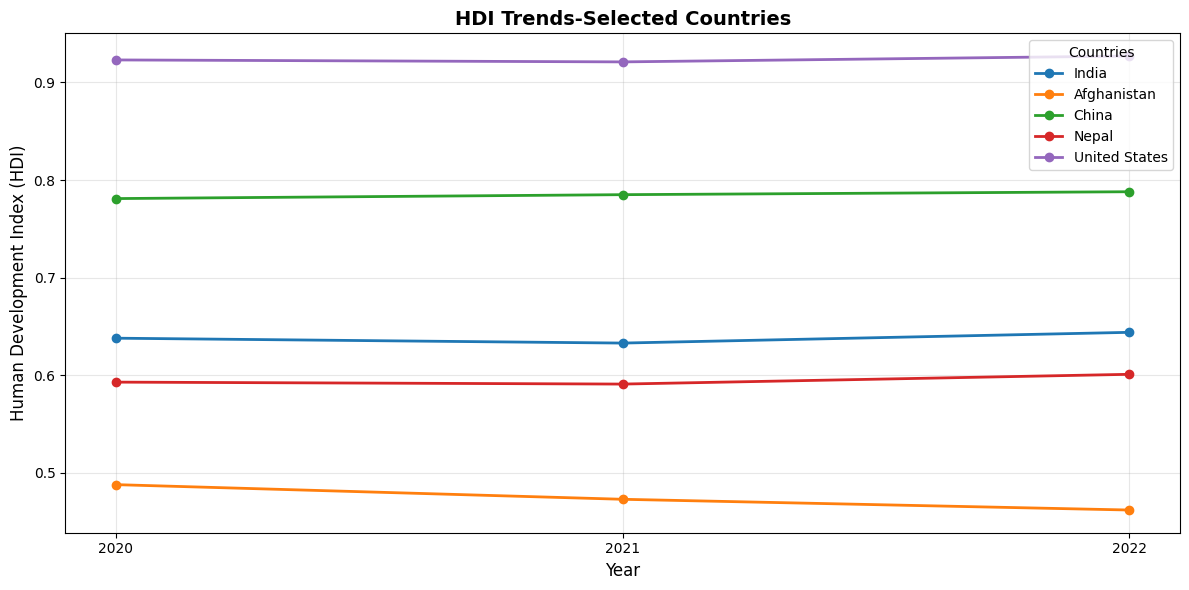

Interpretation: Shows HDI changes over 3 years for selected countries


In [60]:
#Visualization Tasks
print("\nVisualization Task")
#A. Line chart-HDI Trend
print("\nLine chart-HDI Trend")
#selecting 5 countries
selected_countries = ['India', 'Afghanistan', 'China', 'Nepal', 'United States']
#
hdi_trend = hdi_clean[hdi_clean['country'].isin(selected_countries)]
plt.figure(figsize=(12, 6))
for country in selected_countries:
  country_data = hdi_trend[hdi_trend['country'] == country].sort_values('year')
  plt.plot(country_data['year'], country_data['hdi'], marker='o', linewidth=2, label=country)
plt.title('HDI Trends-Selected Countries', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Human Development Index (HDI)', fontsize=12)
plt.xticks([2020, 2021, 2022])
plt.legend(title='Countries')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Interpretation: Shows HDI changes over 3 years for selected countries")

**
**

– Bar Chart: Average HDI by Region (2020–2022)

∗ Group the dataset by Region and Year.

∗ Compute the mean HDI for each region-year pair.

∗ Plot a bar chart comparing average HDI across regions for each year.

∗ Label axes clearly and include a descriptive title.



Barchart


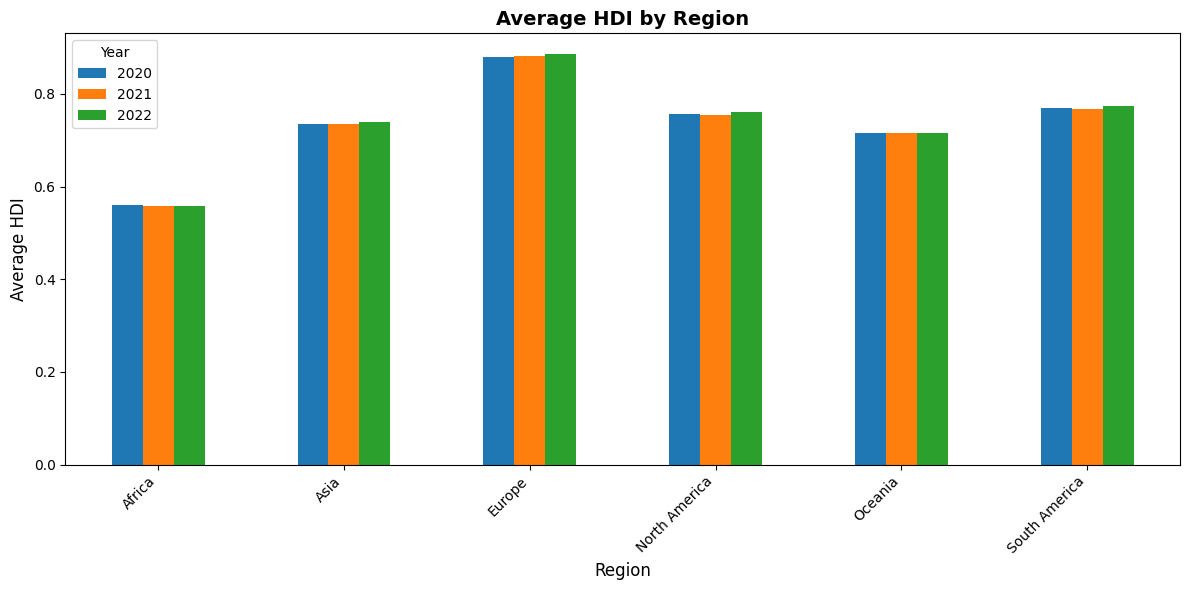

Interpretation: Compares average HDI across regions for each year


In [61]:
#B. Barchart
print("\nBarchart")

if 'Region' in hdi_clean.columns:
  region_avg = hdi_clean.groupby(['Region', 'year'])['hdi'].mean().reset_index()
  plt.figure(figsize=(12, 6))
  pivot_data = region_avg.pivot(index='Region', columns='year', values='hdi')
  pivot_data.plot(kind='bar', ax=plt.gca())
  plt.title('Average HDI by Region', fontsize=14, fontweight='bold')
  plt.xlabel('Region', fontsize=12)
  plt.ylabel('Average HDI', fontsize=12)
  plt.legend(title="Year")
  plt.xticks(rotation=45, ha="right")
  plt.tight_layout()
  plt.show()
  print("Interpretation: Compares average HDI across regions for each year")
else:
  print("Note: Region column not found in dataset. cannot create region-based bar chart")

**Box Plot: HDI Distribution for 2020, 2021, and 2022**

∗ Filter the dataset for the years 2020, 2021, and 2022.

∗ Create a box plot showing HDI spread for each of the three years.

∗ Include titles and axis labels.

∗ Comment briefly on distribution differences.


Box plot-HDI distribution


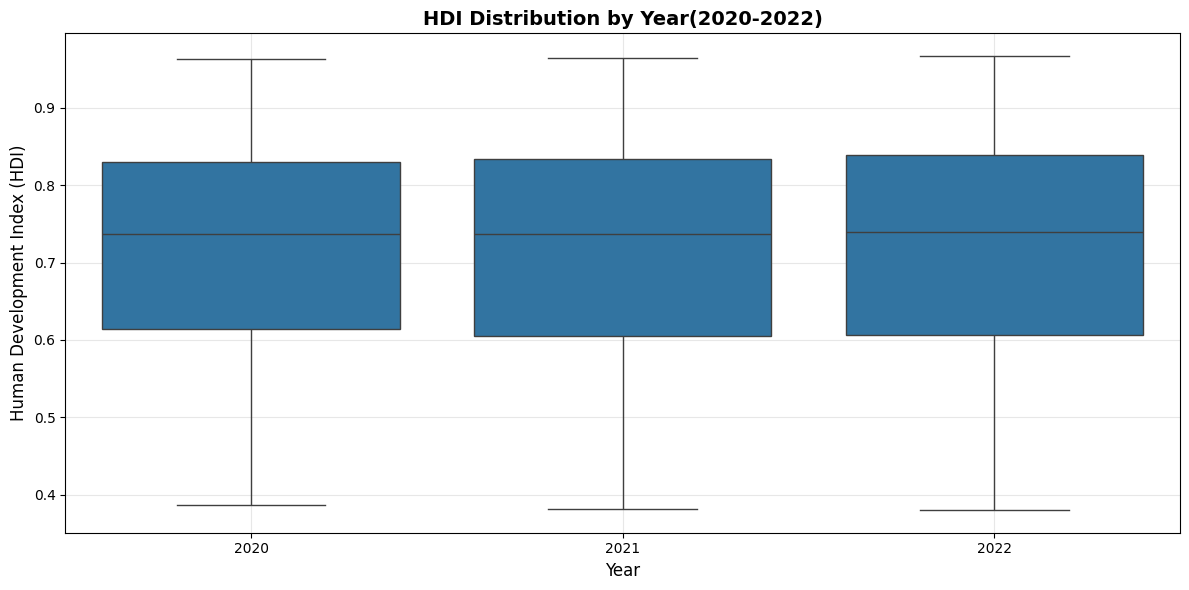

Interpretation: Shows distribution of HDI across years


In [62]:
#C. Box plot-HDI distribution
print("\nBox plot-HDI distribution")
plt.figure(figsize=(12, 6))
sns.boxplot(x='year', y='hdi', data=hdi_clean)
plt.title('HDI Distribution by Year(2020-2022)', fontsize=14, fontweight='bold')
plt.xlabel('Year', fontsize=12)
plt.ylabel('Human Development Index (HDI)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()
print("Interpretation: Shows distribution of HDI across years")

**Scatter Plot: HDI vs. GNI per Capita**

∗ Check if the dataset contains a column for GNI per Capita.

∗ If available:

· Create a scatter plot using HDI as the dependent variable.

· Use GNI per Capita on the x-axis.

· Add a regression line (optional).


Scatter plot-HDI vs GNI per capita


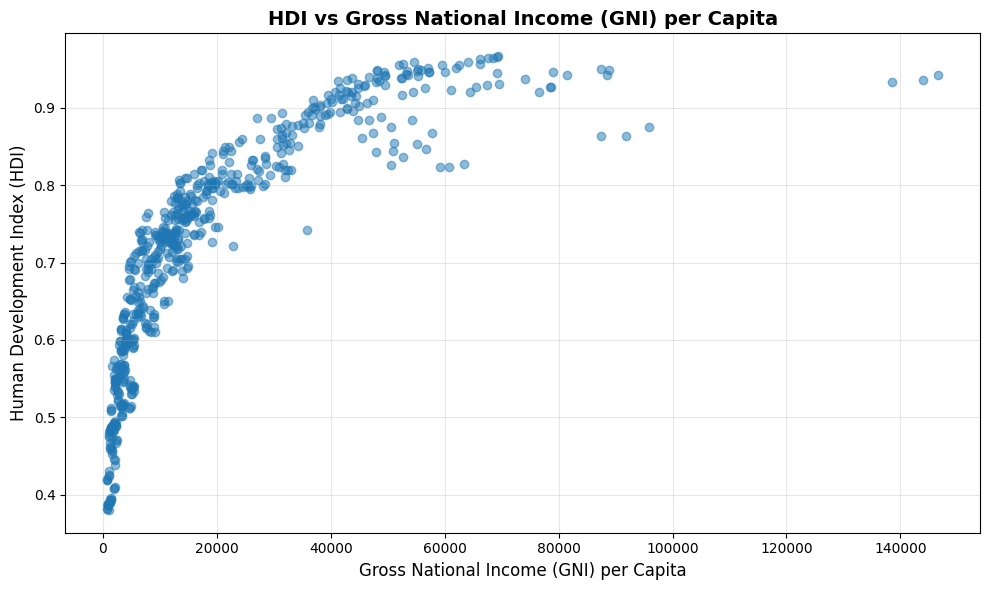

Interpretation: Shows relationship between GNI per capita and HDI


In [63]:

#D Scatter plot-HDI vs GNI per capita
print("\nScatter plot-HDI vs GNI per capita")
if 'gross_inc_percap' in hdi_clean.columns:
  plt.figure(figsize=(10, 6))
  plt.scatter(hdi_clean['gross_inc_percap'], hdi_clean['hdi'], alpha=0.5)
  plt.title('HDI vs Gross National Income (GNI) per Capita', fontsize=14, fontweight='bold')
  plt.xlabel('Gross National Income (GNI) per Capita', fontsize=12)
  plt.ylabel('Human Development Index (HDI)', fontsize=12)
  plt.grid(True, alpha=0.3)
  plt.tight_layout()
  plt.show()
  print("Interpretation: Shows relationship between GNI per capita and HDI")
else:
  print("Note: 'gross_inc_percap' column not found in dataset. Cannot create scatter plot")


**4. Short Analysis Questions:**

• Which countries show the greatest improvement in HDI from 2020 to 2022?

• Did any countries experience a decline in HDI? Provide possible reasons.

• Which region has the highest and lowest average HDI across these three years?

• Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.

In [64]:
#Analysis Questions
print("4. Short Analysis Questions")
print("\n1. Which countries show the greatest improvement in HDI from 2020 to 2022?")
improvement_data = []
for country in hdi_clean['country'].unique():
  country_df = hdi_clean[hdi_clean['country'] == country]
  if(2020 in country_df['year'].values and 2022 in country_df['year'].values):
    hdi_2020 = country_df[country_df['year']==2020]['hdi'].values[0]
    hdi_2022 = country_df[country_df['year']==2022]['hdi'].values[0]
    improvement = hdi_2022 - hdi_2020
    improvement_data.append((country, improvement))
improvement_data.sort(key=lambda x: x[1], reverse=True)
print("Top 5 countries with greatest improvement in HDI from 2020 to 2022:")
for i, (country, improvement) in enumerate(improvement_data[:5], 1):
  print(f"{i}. {country}: {improvement:.2f}")

#2
print("\n2. Did any countries experience a decline in HDI? Provide possible reasons.")
declined_countries = [(c, imp) for c, imp in improvement_data if imp<0]
if declined_countries:
  print(f"\nYes. Countries with decline in HDI: {len(declined_countries)}")
  for country, decline in declined_countries[:5]:
    print(f"{country}: {decline:.2f}")
    print("\n Possible reasons")
    print("Economic crisis")
    print("Impact of COVID-19 pandemic on healthcare and education")
    print("Political instability")

else:
  print("\nNo countries experienced a decline in HDI.")

#3.
print("\n Which region has the highest and lowest average HDI across these three years?")
if 'Region' in hdi_clean.columns:
  region_avg = hdi_clean.groupby('Region')['hdi'].mean().sort_values(ascending=False)
  highest_region = region_avg.index[0]
  lowest_region = region_avg.index[-1]
  print(f"\nRegion with highest average HDI: {highest_region} ({region_avg.iloc[0]:.2f})")
  print(f"Region with lowest average HDI: {lowest_region} ({region_avg.iloc[-1]:.2f})")

  print("\nRegional HDI rankings: ")
  for i, (region, avg_hdi) in enumerate(region_avg.items(), 1):
    print(f"{i}.{region}:{avg_hdi:.2f}")
else:
  print("Note: Region column not found in dataset.")

#4
print("4. Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during this period")
print("\nImpact of COVID-19 on HDI (2020-2022): ")
print("\nLife Expectancy: ")
print(" Healthcare system strain")
print(" Increased mortality rate")
print(" Disruption of routine healthcare services")
print("\nEducation: ")
print(" School closures and remote learning challenges")
print(" Digital divide affecting access to education")
print(" Learning loss and skill gaps")
print("\nStandard of Living: ")
print(" Economic slowdown and job losses")
print(" Reduced household incomes")
print(" Increased poverty rates")
print("\nOverall HDI Trends: ")
print(" Slower HDI growth in 2020-2021 for many countries")
print(" Some recovery visible in 2022 data")
print(" Developing countries more severely affected")
print(" Widened development gaps between nations")

4. Short Analysis Questions

1. Which countries show the greatest improvement in HDI from 2020 to 2022?
Top 5 countries with greatest improvement in HDI from 2020 to 2022:
1. Andorra: 0.04
2. Azerbaijan: 0.04
3. Ecuador: 0.03
4. Maldives: 0.03
5. Mexico: 0.02

2. Did any countries experience a decline in HDI? Provide possible reasons.

Yes. Countries with decline in HDI: 54
Egypt: -0.00

 Possible reasons
Economic crisis
Impact of COVID-19 pandemic on healthcare and education
Political instability
Jamaica: -0.00

 Possible reasons
Economic crisis
Impact of COVID-19 pandemic on healthcare and education
Political instability
Kiribati: -0.00

 Possible reasons
Economic crisis
Impact of COVID-19 pandemic on healthcare and education
Political instability
Lithuania: -0.00

 Possible reasons
Economic crisis
Impact of COVID-19 pandemic on healthcare and education
Political instability
North Macedonia: -0.00

 Possible reasons
Economic crisis
Impact of COVID-19 pandemic on healthcare and educat

# **Problem 2**

# **Advanced HDI Exploration**

# **Objective:**

Perform advanced analysis of HDI data, focusing on South Asian countries, composite metrics, outlier detec-
tion, metric relationships, and gap analysis.

**1. Create South Asia Subset:**

• Define the list of South Asian countries: ["Afghanistan", "Bangladesh", "Bhutan", "India",
"Maldives", "Nepal", "Pakistan", "Sri Lanka"].

• Filter the HDI dataset to include only these countries.

• Save the filtered dataset as HDI SouthAsia.csv and include this file in the final submission.

In [65]:
#Problem 2
#Advanced HDI exploration
#Task1
south_asia_countries = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]
south_asia_df = df[df['country'].isin(south_asia_countries)].copy()
if 'year' in south_asia_df.columns:
    south_asia_df = south_asia_df[south_asia_df['year'] == south_asia_df['year'].max()]
cols = ['hdi', 'gross_inc_percap', 'life_expectancy', 'gender_development']
for col in cols:
  south_asia_df[col] = pd.to_numeric(south_asia_df[col], errors='coerce')

south_asia_df.to_csv('HDI_SouthAsia.csv', index=False)
print("HDI_SouthAsia.csv saved")



HDI_SouthAsia.csv saved


**2. Composite Development Score:**

• Create a new metric called Composite Score using the formula:

Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"

• Rank South Asian countries based on Composite Score.

• Plot the top 5 countries in a horizontal bar chart.

• Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
differences.

Composite Score Ranking
          country  Composite_Score
3530     Maldives      5678.289357
5477    Sri Lanka      3592.832541
659        Bhutan      3209.130864
2573        India      2105.481239
461    Bangladesh      1975.446053
4388     Pakistan      1632.210427
4091        Nepal      1228.811605
32    Afghanistan       419.425420

HDI Ranking
          country    hdi
5477    Sri Lanka  0.780
3530     Maldives  0.762
659        Bhutan  0.681
461    Bangladesh  0.670
2573        India  0.644
4091        Nepal  0.601
4388     Pakistan  0.540
32    Afghanistan  0.462


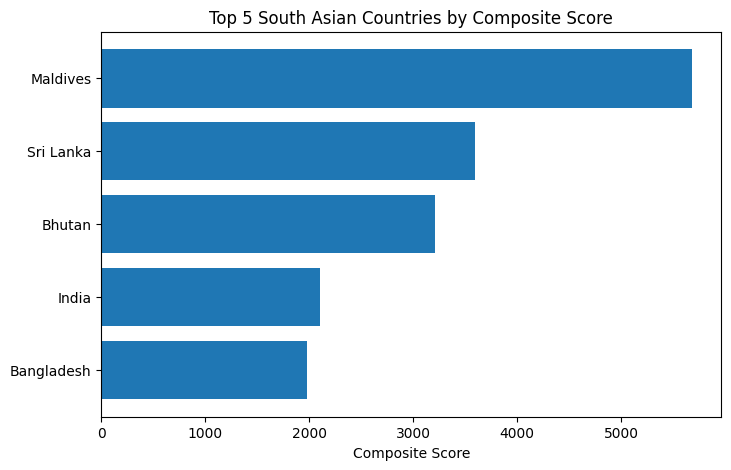

In [66]:
#Task2
south_asia_df['Composite_Score'] = (
  0.30 * south_asia_df['life_expectancy'] +
  0.30 * south_asia_df['gross_inc_percap']
)

composite_rank = south_asia_df.sort_values('Composite_Score', ascending=False)
hdi_rank = south_asia_df.sort_values('hdi', ascending=False)

print("Composite Score Ranking")
print(composite_rank[['country', 'Composite_Score']])

print("\nHDI Ranking")
print(hdi_rank[['country', 'hdi']])
#plotting top 5 countries
top5 = composite_rank.head(5)
plt.figure(figsize=(8,5))
plt.barh(top5['country'], top5['Composite_Score'])
plt.xlabel('Composite Score')
plt.title('Top 5 South Asian Countries by Composite Score')
plt.gca().invert_yaxis()
plt.show()

**3. Outlier Detection:**

• Detect outliers in HDI and GNI per Capita using the 1.5 × IQR rule.

• Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.

• Discuss why the identified countries stand out as outliers.

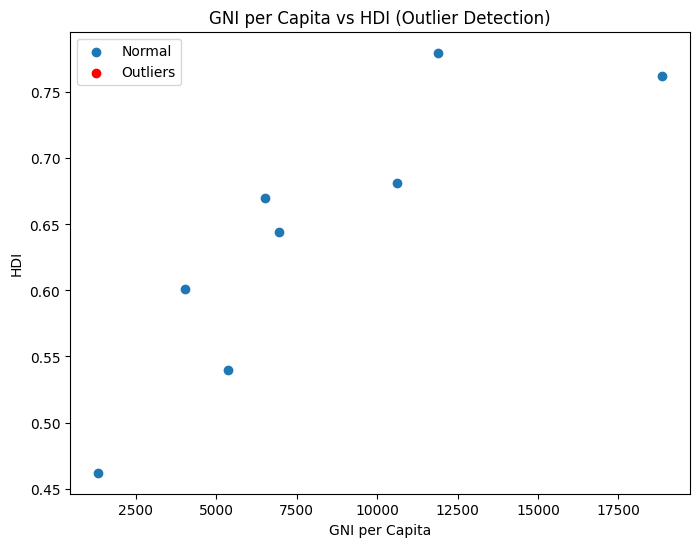

In [67]:
#Task3
def detect_outliers_iqr(data, column):
  Q1 = data[column].quantile(0.25)
  Q3 = data[column].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  return data[(data[column] < lower) | (data[column] > upper)]

hdi_outliers = detect_outliers_iqr(south_asia_df, 'hdi')
gni_outliers = detect_outliers_iqr(south_asia_df, 'gross_inc_percap')
plt.figure(figsize=(8,6))

plt.scatter(south_asia_df['gross_inc_percap'], south_asia_df['hdi'], label='Normal')
plt.scatter(gni_outliers['gross_inc_percap'], gni_outliers['hdi'], color='red', label='Outliers')
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.title('GNI per Capita vs HDI (Outlier Detection)')
plt.legend()
plt.show()

**4. Exploring Metric Relationships:**

• Select two HDI components (e.g., Gender Development Index {"gender development"} and Life
Expectancy Index {"life expectancy"}).

• Compute Pearson correlation of each metric with HDI.

• Create scatter plots with trendlines to visualize the relationships.

• Discuss:

– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.


Correlation between gender_development and HDI
Pearson r = 0.885


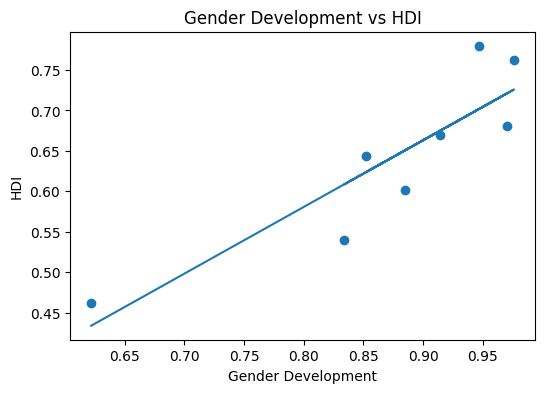


Correlation between life_expectancy and HDI
Pearson r = 0.928


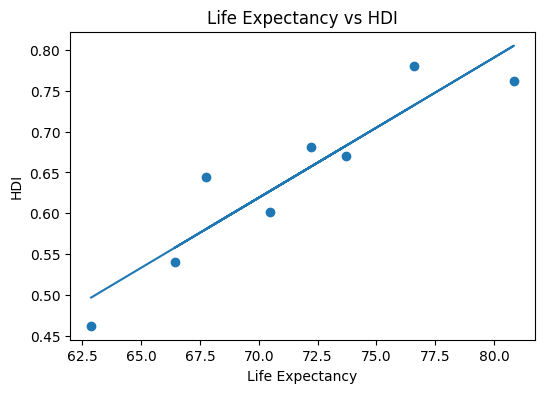

In [68]:
#Task4
metrics = ['gender_development', 'life_expectancy']

for metric in metrics:
  clean_data = south_asia_df[[metric, 'hdi']].dropna()
  r, p = pearsonr(clean_data[metric], clean_data['hdi'])

  print(f"\nCorrelation between {metric} and HDI")
  print(f"Pearson r = {r:.3f}")

  plt.figure(figsize=(6,4))
  plt.scatter(clean_data[metric], clean_data['hdi'])
  z = np.polyfit(clean_data[metric], clean_data['hdi'], 1)
  plt.plot(clean_data[metric], np.poly1d(z)(clean_data[metric]))
  plt.xlabel(metric.replace('_', ' ').title())
  plt.ylabel('HDI')
  plt.title(f'{metric.replace("_"," ").title()} vs HDI')
  plt.show()

**5. Gap Analysis:**

• Create a new metric:

GNI HDI Gap = "gross inc percap" − "hdi"

• Rank South Asian countries by GNI HDI Gap in descending and ascending order.

• Plot the top 3 positive gaps and top 3 negative gaps.

• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.

Gap Analysis

Top 3 Positive Gaps (GNI > HDI)
        country  GNI_HDI_Gap
3530   Maldives  18846.03019
5477  Sri Lanka  11898.71847
659      Bhutan  10624.19288

Top 3 Negative Gaps (GNI < HDI)
          country  GNI_HDI_Gap
32    Afghanistan  1334.743733
4091        Nepal  4024.953685
4388     Pakistan  5373.730423


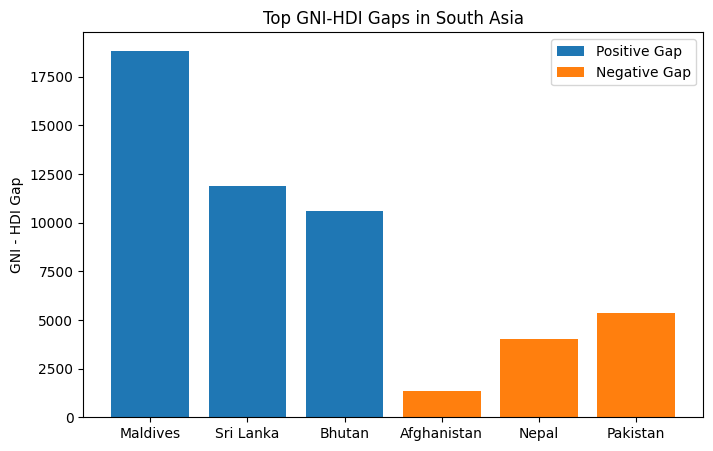

In [69]:

#Task5
print("Gap Analysis")
south_asia_df['GNI_HDI_Gap'] = (south_asia_df['gross_inc_percap'] - south_asia_df['hdi'])

gap_desc = south_asia_df.sort_values('GNI_HDI_Gap', ascending=False)
gap_asc = south_asia_df.sort_values('GNI_HDI_Gap')

print("\nTop 3 Positive Gaps (GNI > HDI)")
print(gap_desc[['country', 'GNI_HDI_Gap']].head(3))

print("\nTop 3 Negative Gaps (GNI < HDI)")
print(gap_asc[['country', 'GNI_HDI_Gap']].head(3))

top_pos = gap_desc.head(3)
top_neg = gap_asc.head(3)
plt.figure(figsize=(8,5))
plt.bar(top_pos['country'], top_pos['GNI_HDI_Gap'], label='Positive Gap')
plt.bar(top_neg['country'], top_neg['GNI_HDI_Gap'], label='Negative Gap')
plt.ylabel('GNI - HDI Gap')
plt.title('Top GNI-HDI Gaps in South Asia')
plt.legend()
plt.show()


# **Problem 3**
# **Comparative Regional Analysis: South Asia vs Middle East**

# **Objective:**

 **Perform a comparative analysis of HDI and related metrics between South Asia and the Middle East using
the 2020–2022 dataset from Problem 1B.**

**1. Create Middle East Subset:**

• Define the list of Middle East countries: ["Bahrain", "Iran", "Iraq", "Israel", "Jordan",
"Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria",
"United Arab Emirates", "Yemen"].

• Filter the dataset from Problem 1B (HDI problem1B.csv) to create subsets for South Asia and
Middle East.

• Save these subsets as HDI SouthAsia 2020 2022.csv and HDI MiddleEast 2020 2022.csv for
use in subsequent tasks.

In [70]:
#Problem 3
#Task1
south_asia = ["Afghanistan", "Bangladesh", "Bhutan", "India", "Maldives", "Nepal", "Pakistan", "Sri Lanka"]
middle_east = ["Bahrain", "Iran", "Iraq", "Israel", "Jordan", "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar", "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"]
df_2020_2022 = df[df['year'].between(2020, 2022)]
south_asia_df = df_2020_2022[df_2020_2022['country'].isin(south_asia)].copy()
middle_east_df = df_2020_2022[df_2020_2022['country'].isin(middle_east)].copy()
cols = ['hdi', 'gender_development', 'life_expectancy', 'gross_inc_percap']
for col in cols:
  south_asia_df[col] = pd.to_numeric(south_asia_df[col], errors='coerce')
  middle_east_df[col] = pd.to_numeric(middle_east_df[col], errors='coerce')

south_asia_df.to_csv('HDI_SouthAsia_2020_2022.csv', index=False)
middle_east_df.to_csv('HDI_MiddleEast_2020_2022.csv', index=False)
print("CSV files saved successfully")


CSV files saved successfully


**2. Descriptive Statistics:**

• Compute the mean and standard deviation of HDI for each region (South Asia vs Middle East)
across 2020–2022.

• Identify which region performs better on average.

In [71]:
#Task2
sa_mean, sa_std = south_asia_df['hdi'].mean(), south_asia_df['hdi'].std()
me_mean, me_std = middle_east_df['hdi'].mean(), middle_east_df['hdi'].std()

print("\nHDI Statistics")

print(f"South Asia -> Mean: {sa_mean:.3f}, Std: {sa_std:.3f}")
print(f"Middle East -> Mean: {me_mean:.3f}, Std: {me_std:.3f}")
if me_mean > sa_mean:
  print("Middle East performs better in HDI on average")
else:
  print("South Asia performs better in HDI on average")


HDI Statistics
South Asia -> Mean: 0.640, Std: 0.098
Middle East -> Mean: 0.789, Std: 0.141
Middle East performs better in HDI on average


**3. Top and Bottom Performers:**

• Identify the top 3 and bottom 3 countries in each region based on HDI.

• Create a bar chart comparing these top and bottom performers across the two regions.

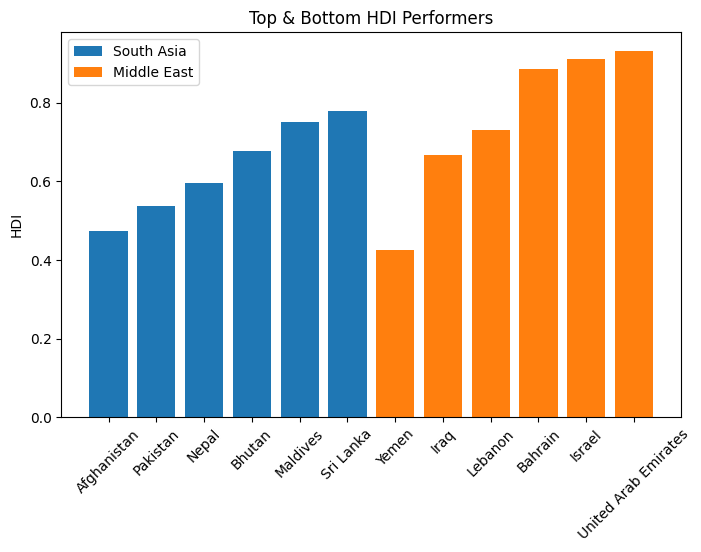

In [72]:
#Task3
sa_avg = south_asia_df.groupby('country')['hdi'].mean().sort_values()
me_avg = middle_east_df.groupby('country')['hdi'].mean().sort_values()

sa_top_bottom = pd.concat([sa_avg.head(3), sa_avg.tail(3)])
me_top_bottom = pd.concat([me_avg.head(3), me_avg.tail(3)])

plt.figure(figsize=(8,5))
plt.bar(sa_top_bottom.index, sa_top_bottom.values, label='South Asia')
plt.bar(me_top_bottom.index, me_top_bottom.values, label='Middle East')
plt.xticks(rotation=45)
plt.ylabel('HDI')
plt.title('Top & Bottom HDI Performers')
plt.legend()
plt.show()

**4. Metric Comparisons:**

• Compare the following metrics across regions using grouped bar charts:

– Gender Development Index {"gender development"}

– Life Expectancy Index {"life expectancy"}

– GNI per Capita Index {"gross inc percap"}

• Identify which metric shows the greatest disparity between regions.

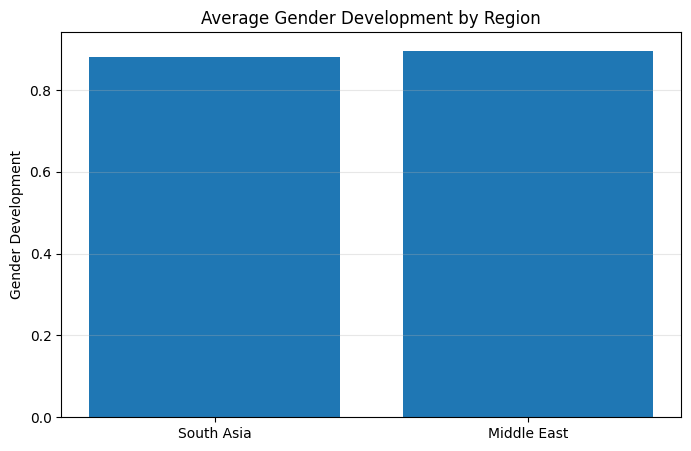

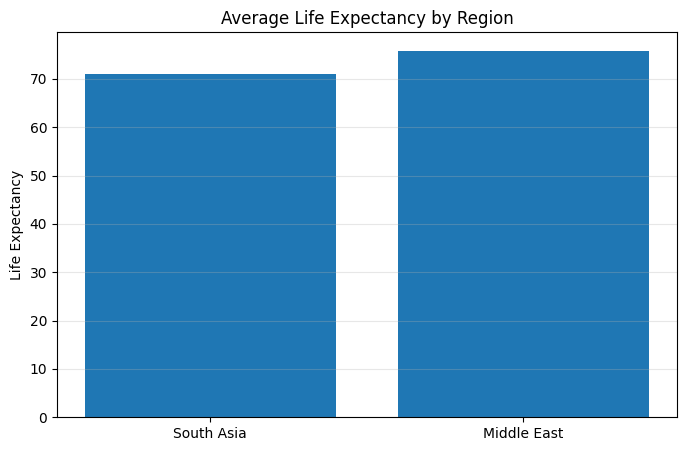

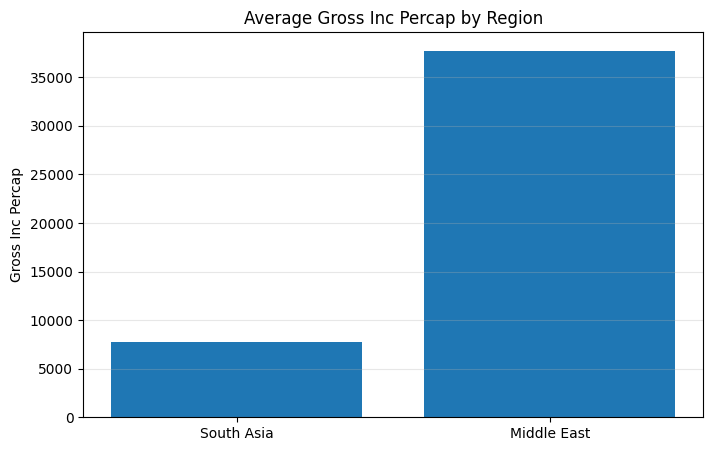


Task 4 Conclusion
Metric with greatest disparity:  gross_inc_percap


In [73]:

#Task4
metrics = ['gender_development', 'life_expectancy', 'gross_inc_percap']

sa_means = south_asia_df[metrics].mean()
me_means = middle_east_df[metrics].mean()

for metric in metrics:
  plt.figure(figsize=(8,5))
  plt.bar(['South Asia', 'Middle East'], [sa_means[metric], me_means[metric]])
  plt.ylabel(metric.replace('_', ' ').title())
  plt.title(f'Average {metric.replace("_", " ").title()} by Region')
  plt.grid(axis='y', alpha=0.3)
  plt.show()

disparity = abs(sa_means - me_means)
print("\nTask 4 Conclusion")
print("Metric with greatest disparity: ", disparity.idxmax())

**5. HDI Disparity:**

• Compute the range (max – min) of HDI for each region.

• Compute the coefficient of variation (CV = std/mean) for HDI.

• Identify which region exhibits more variation in HDI.

In [74]:
#Task5
sa_range = south_asia_df['hdi'].max() - south_asia_df['hdi'].min()
me_range = middle_east_df['hdi'].max() - middle_east_df['hdi'].min()
sa_cv = sa_std / sa_mean
me_cv = me_std / me_mean

print("HDI Disparity")
print(f"South Asia -> Range: {sa_range:.3f}, CV: {sa_cv:.3f}")
print(f"Middle East -> Range: {me_range:.3f}, CV: {me_cv:.3f}")
if me_cv > sa_cv:
  print("Middle East has greater HDI variation")
else:
  print("South Asia has greater HDii variation")

HDI Disparity
South Asia -> Range: 0.321, CV: 0.154
Middle East -> Range: 0.513, CV: 0.179
Middle East has greater HDI variation


**6. Correlation Analysis:**

• For each region, compute correlations of HDI with:

– Gender Development Index

– Life Expectancy Index

• Create scatter plots with trendlines for each correlation.

• Interpret the strength and direction of these relationships.

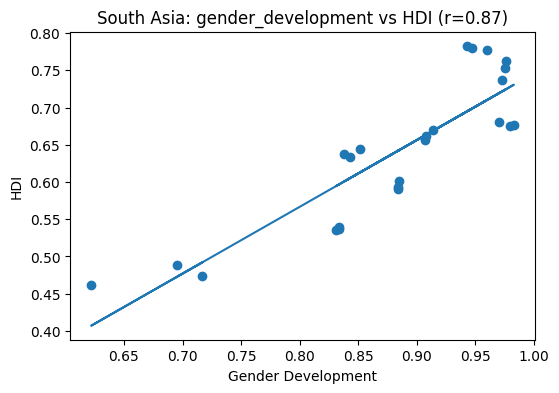

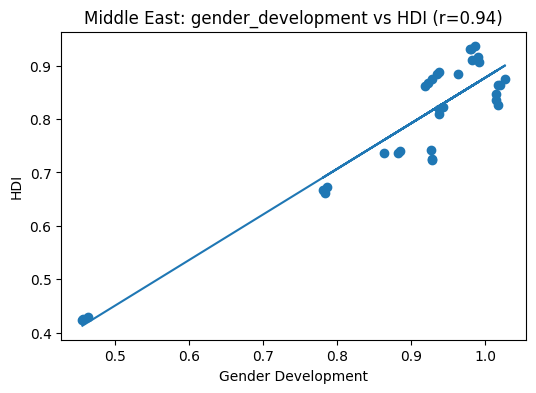

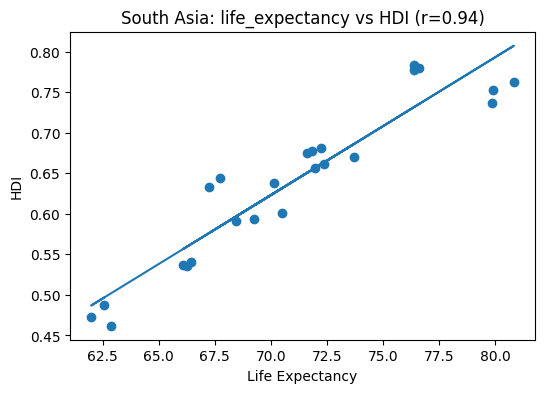

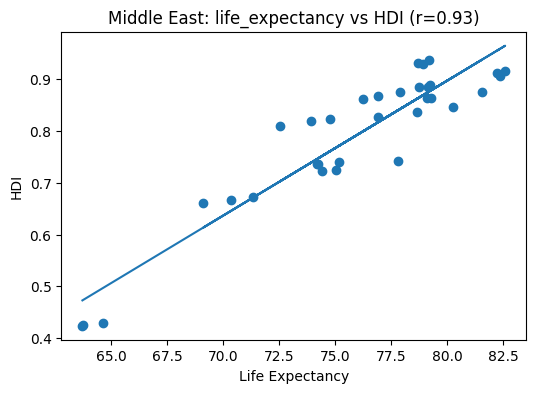

In [75]:
#Task6
def correlation_plot(df_region, region_name, metric):
  clean = df_region[[metric, 'hdi']].dropna()
  r, _ = pearsonr(clean[metric], clean['hdi'])
  plt.figure(figsize=(6,4))
  plt.scatter(clean[metric], clean['hdi'])
  z = np.polyfit(clean[metric], clean['hdi'], 1)
  plt.plot(clean[metric], np.poly1d(z)(clean[metric]))
  plt.xlabel(metric.replace('_', ' ').title())
  plt.ylabel('HDI')
  plt.title(f'{region_name}: {metric} vs HDI (r={r:.2f})')
  plt.show()

for metric in ['gender_development', 'life_expectancy']:
  correlation_plot(south_asia_df, 'South Asia', metric)
  correlation_plot(middle_east_df, 'Middle East', metric)

**7. Outlier Detection:**

• Detect outliers in HDI {"hdi"} and GNI per Capita {"gross inc percap"} for each region using
the 1.5 × IQR rule.

• Create scatter plots highlighting outliers in a different color.

• Discuss the significance of these outliers.

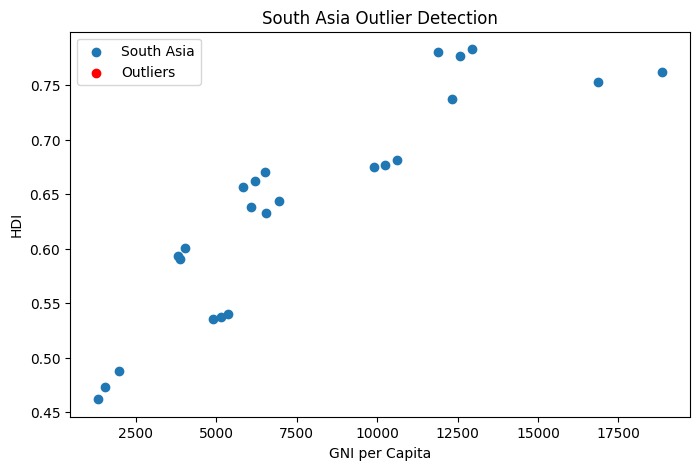

South Asia Outlier detection


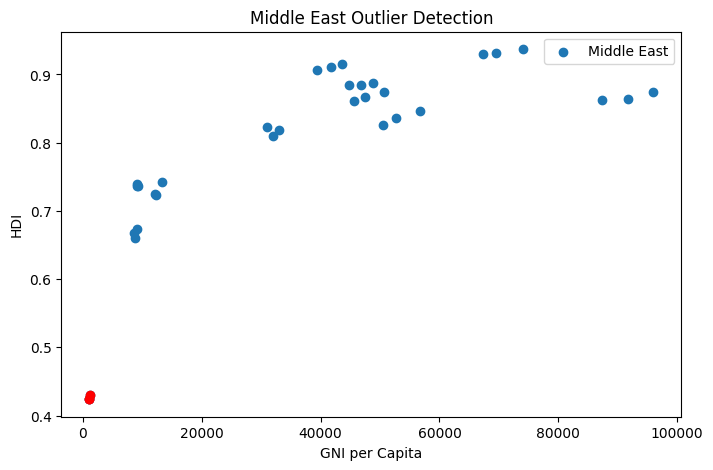

Total south Asia Outliers:  0
Total Middle East Outliers:  3
Outliers represent countries with exceptionally high or low income relative to regional HDI trends


In [76]:

#Task7
def detect_outliers_iqr(df, col):
  Q1 = df[col].quantile(0.25)
  Q3 = df[col].quantile(0.75)
  IQR = Q3 - Q1
  lower = Q1 - 1.5 * IQR
  upper = Q3 + 1.5 * IQR
  return df[(df[col] < lower) | (df[col] > upper)]

sa_gni_out = detect_outliers_iqr(south_asia_df, 'gross_inc_percap')
sa_hdi_out = detect_outliers_iqr(south_asia_df, 'hdi')
me_gni_out = detect_outliers_iqr(middle_east_df, 'gross_inc_percap')
me_hdi_out = detect_outliers_iqr(middle_east_df, 'hdi')

sa_outliers = pd.concat([sa_gni_out, sa_hdi_out])
me_outliers = pd.concat([me_gni_out, me_hdi_out])
plt.figure(figsize=(8,5))
plt.scatter(south_asia_df['gross_inc_percap'], south_asia_df['hdi'], label='South Asia')
plt.scatter(sa_outliers['gross_inc_percap'], sa_outliers['hdi'], color='red', label = 'Outliers')
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.title('South Asia Outlier Detection')
plt.legend()
plt.show()

print("South Asia Outlier detection")

plt.figure(figsize=(8,5))
plt.scatter(middle_east_df['gross_inc_percap'], middle_east_df['hdi'], label='Middle East')
plt.scatter(me_outliers['gross_inc_percap'], me_outliers['hdi'], color='red')
plt.xlabel('GNI per Capita')
plt.ylabel('HDI')
plt.title('Middle East Outlier Detection')
plt.legend()
plt.show()

print("Total south Asia Outliers: ", len(sa_outliers))
print("Total Middle East Outliers: ", len(me_outliers))
print("Outliers represent countries with exceptionally high or low income relative to regional HDI trends")